In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model

from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

import random

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"

assert(X_train.shape[1:] == (28, 28)), "The dimentions of the images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimentions of the images are not 28x28"

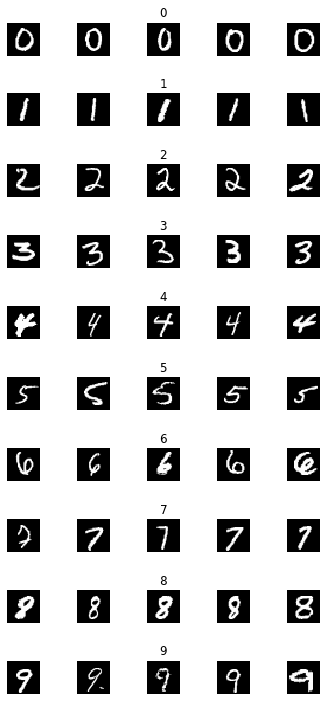

In [6]:
number_of_sample = []

cols = 5
rows = 10

fig, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (5, 10))
fig.tight_layout()

for i in range(cols):
    for j in range(rows):
        x_select = X_train[y_train == j]
        axs[j][i].imshow(
            x_select[random.randint(0, len(x_select - 1)), :, :], 
            cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            number_of_sample.append(len(x_select))


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


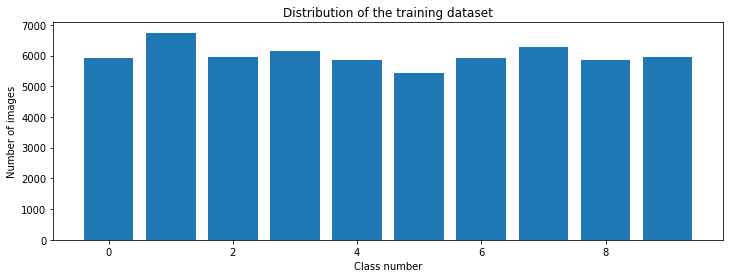

In [7]:
print(number_of_sample)
plt.figure(figsize=(12, 4))
plt.bar(range(0, rows), number_of_sample)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
# Define the LeNet model function

def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), 
                     input_shape = (28, 28, 1), 
                     activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(15, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dense(500, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(rows, activation = 'softmax'))
    model.compile(Adam(lr = 0.01), 
                  loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])
    return model

In [12]:
model = leNet_model()

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)              

In [13]:
history = model.fit(X_train, y_train, 
                     epochs = 10, 
                     validation_split = 0.1,
                     batch_size = 400,
                     verbose = 1,
                     shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 13s 237us/step - loss: 0.2230 - accuracy: 0.9294 - val_loss: 0.0493 - val_accuracy: 0.9828
Epoch 2/10
54000/54000 [==============================] - 13s 246us/step - loss: 0.0673 - accuracy: 0.9793 - val_loss: 0.0424 - val_accuracy: 0.9877
Epoch 3/10
54000/54000 [==============================] - 13s 239us/step - loss: 0.0528 - accuracy: 0.9839 - val_loss: 0.0330 - val_accuracy: 0.9907
Epoch 4/10
54000/54000 [==============================] - 13s 233us/step - loss: 0.0470 - accuracy: 0.9857 - val_loss: 0.0323 - val_accuracy: 0.9897
Epoch 5/10
54000/54000 [==============================] - 13s 236us/step - loss: 0.0412 - accuracy: 0.9874 - val_loss: 0.0369 - val_accuracy: 0.9902
Epoch 6/10
54000/54000 [==============================] - 13s 238us/step - loss: 0.0410 - accuracy: 0.9878 - val_loss: 0.0380 - val_accuracy: 0.9897
Epoch 7/10
54000/54000 [==============================] -

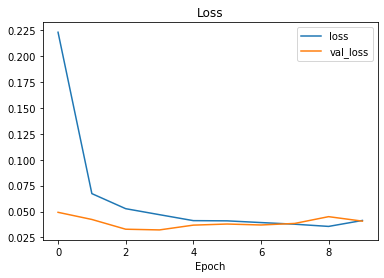

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.legend(['loss', 'val_loss'])
plt.xlabel("Epoch")
plt.show()

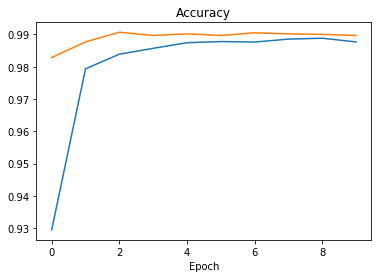

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [16]:
score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 102us/step


In [17]:
print('Test score', np.round(score[0], 4))
print('Test accuracy', np.round(score[1], 4))

Test score 0.0382
Test accuracy 0.9881


In [39]:
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)